In [1]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report

In [3]:
# set the target property
target_property = 'Orthogonal planes'

In [4]:
# load data
df = pd.read_csv('../data/CCDC_descriptors.csv', delimiter=';', decimal=',')
df_property = pd.read_csv('../data/dataset_' + target_property + '.csv')

In [5]:
# split the dataset into training and test samples
X_train, X_test, y_train, y_test = train_test_split(df_property, df[target_property], test_size=0.2, random_state=42)

# create and fit the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, subsample=0.8, random_state=42)
model.fit(X_train, y_train)

# make predictions for the test sample
y_predict_proba = model.predict_proba(X_test)[:, 1]

In [6]:
# obtain data for plotting precision and recall curves
precision, recall, thresholds2 = precision_recall_curve(y_test, y_predict_proba)

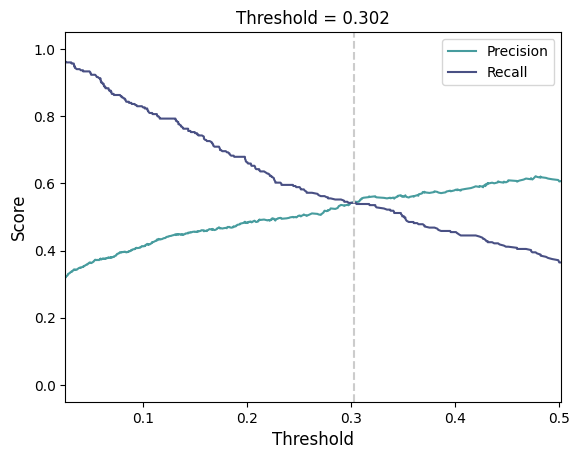

In [18]:
# plot the curves and determine the threshold value at the intersection of the curves
plt.plot(thresholds2, precision[1:], label = "Precision", color='#479C9E')
plt.plot(thresholds2, recall[1:], label = "Recall", color='#495084')
plt.legend(loc = 0)
plt.xlim([0.025, thresholds2[np.argmin(abs(precision-recall))] + 0.2])
plt.xlabel("Threshold", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.axvline(thresholds2[np.argmin(abs(precision-recall))], color='#CCCCCC', ls = "--")
plt.title(label = F"Threshold = {thresholds2[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
plt.show()

In [14]:
# make a prediction with the set thrashhold
y_pred = (model.predict_proba(X_test)[:,1] >= 0.302).astype(int)

In [15]:
# check the metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       907
           1       0.54      0.54      0.54       299

    accuracy                           0.77      1206
   macro avg       0.70      0.70      0.70      1206
weighted avg       0.77      0.77      0.77      1206

